In [1]:
# packages
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

# Lorenz system

first order system of differential equations

$\frac{dx}{dt} = \sigma(y - x)$

$\frac{dy}{dt} = x(\rho - z) - y$

$\frac{dz}{dt} = xy - \beta z$

In [2]:
# define Lorenz system
def lorenz_f(x, y, z, sigma, rho, beta):
    
    xp = sigma*(y - x)
    yp = x*(rho - z) - y
    zp = x*y - beta*z
    
    return xp, yp, zp

In [16]:
# constants

dt = 0.02
n = 5000

sigma = 10
rho = 20
beta = 3

x0 = 0
y0 = 1
z0 = 1

# empty arrays
x = np.empty(n + 1)
y = np.empty(n + 1)
z = np.empty(n + 1)

x_tilde = np.empty(n + 1)
y_tilde = np.empty(n + 1)
z_tilde = np.empty(n + 1)

# initial conditions
x[0] = x0
y[0] = y0
z[0] = z0

# generate values
for i in range(n):
    
#     # Euler's Method
#     xp, yp, zp = lorenz_f(x[i], y[i], z[i], sigma, rho, beta)

#     x[i + 1] = x[i] + xp*dt
#     y[i + 1] = y[i] + yp*dt
#     z[i + 1] = z[i] + zp*dt
    
    # Euler's Improved Method
    m0x, m0y, m0z = lorenz_f(x[i], y[i], z[i], sigma, rho, beta)
    
    x_tilde[i + 1] = x[i] + m0x*dt
    y_tilde[i + 1] = y[i] + m0y*dt
    z_tilde[i + 1] = z[i] + m0z*dt
    
    m1x, m1y, m1z = lorenz_f(x_tilde[i], y_tilde[i], z_tilde[i], sigma, rho, beta)
    
    mx = (m0x + m1x)/2
    my = (m0y + m1y)/2
    mz = (m0z + m1z)/2
    
    x[i + 1] = x[i] + mx*dt
    y[i + 1] = y[i] + my*dt
    z[i + 1] = z[i] + mz*dt

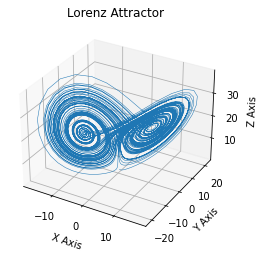

In [17]:
# create 3D plot
fig = plt.figure()
axis = fig.gca(projection='3d')

axis.plot(x, y, z, lw=0.5)
axis.set_xlabel("X Axis")
axis.set_ylabel("Y Axis")
axis.set_zlabel("Z Axis")
axis.set_title("Lorenz Attractor")

plt.show()